## Naive Bayes Assignment

### 1) Prepare a classification model using Naive Bayes 

In [1]:
# Import required libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB
from sklearn.metrics import confusion_matrix

In [2]:
# read the training data
train = pd.read_csv('SalaryData_Train.csv')
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# read the tesing data
test = pd.read_csv('SalaryData_Test.csv')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
#more information of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
#more information of test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
age              15060 non-null int64
workclass        15060 non-null object
education        15060 non-null object
educationno      15060 non-null int64
maritalstatus    15060 non-null object
occupation       15060 non-null object
relationship     15060 non-null object
race             15060 non-null object
sex              15060 non-null object
capitalgain      15060 non-null int64
capitalloss      15060 non-null int64
hoursperweek     15060 non-null int64
native           15060 non-null object
Salary           15060 non-null object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
#Describing the train data
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#Describing the test data
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [8]:
# Dimentions of train data
train.shape

(30161, 14)

In [9]:
# Dimentions of test data
test.shape

(15060, 14)

workclass


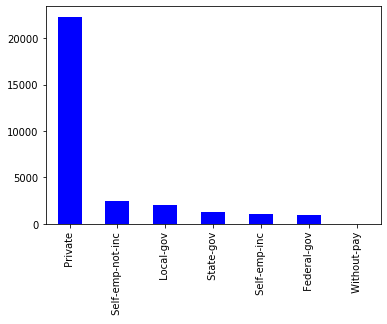

education


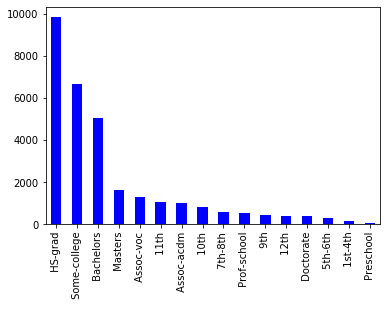

maritalstatus


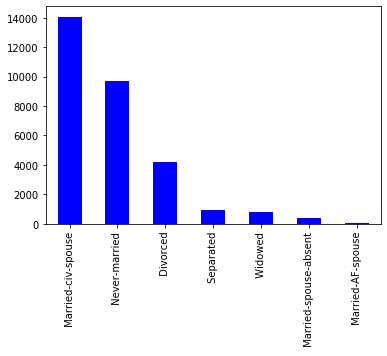

occupation


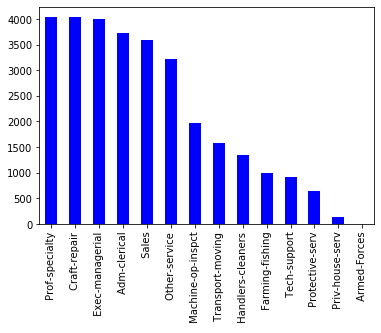

relationship


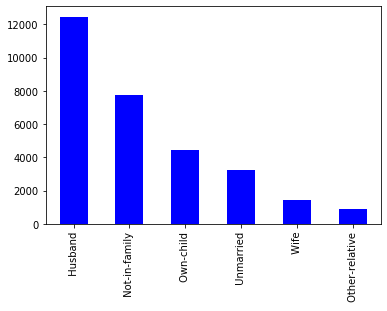

race


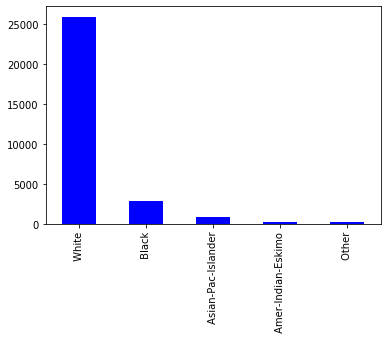

sex


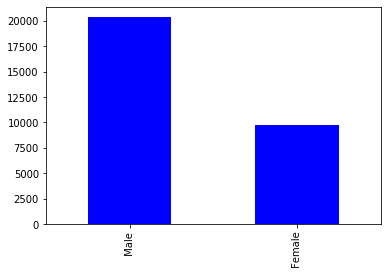

native


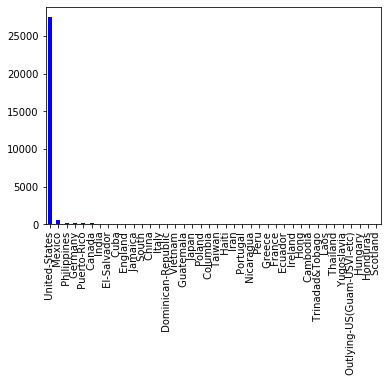

Salary


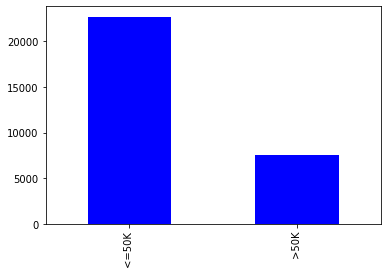

In [10]:
#Plotting the categarical columns
for i in train:
    if train[i].dtype == 'object':
        print(i)
        train[i].value_counts().plot.bar(color='blue')
        plt.show()
    else:
        pass

for i in train:
    if train[i].dtype != 'object':
        print(i)
        sns.boxplot(train[i])
        plt.show()
    else:
        pass

In [11]:
#One-hot encoding for train data
train_one = pd.get_dummies(train.iloc[:,:13])
train_one.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#One-hot encoding for test data
test_one = pd.get_dummies(test.iloc[:,:13])
test_one.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
#including the Salary column to encoded train data
train_final = pd.concat([train_one,train['Salary']], axis = 1)
train_final.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [14]:
#including the Salary column to encoded test data
test_final = pd.concat([test_one,test['Salary']], axis = 1)
test_final.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,>50K
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,>50K
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


In [15]:
# dividing the data

# Final train data
X = train_final.values[:,0:102]
Y = train_final.values[:,102]

#Final test data
x = test_final.values[:,0:102]
y = test_final.values[:,102]

## Naive Bayes Algorithm

### 1. Multinomial Naive Bayes

In [16]:
# Applying the Multinomial Naive Bayes model. fit to train data and predicting
classifier_mb = MultinomialNB()
classifier_mb.fit(X,Y)
train_pred_m = classifier_mb.predict(X)
accuracy_train_m = np.mean(train_pred_m==Y)

In [17]:
#Predicting using test data
test_pred_m = classifier_mb.predict(x)
accuracy_test_m = np.mean(test_pred_m==y)

In [18]:
#Accuracy of model
print('Training accuracy is:',accuracy_train_m,'\n','Testing accuracy is:',accuracy_test_m)

Training accuracy is: 0.7729186698053778 
 Testing accuracy is: 0.7749667994687915


In [19]:
# Validation using Confusion matrix
print(confusion_matrix(train_pred_m,Y))
print(confusion_matrix(test_pred_m,y))

[[21717  5913]
 [  936  1595]]
[[10891  2920]
 [  469   780]]


## 2. Complement Naive Bayes

In [20]:
# Applying the Multinomial Naive Bayes model. fit to train data and predicting
classifier_gb = ComplementNB()
classifier_gb.fit(X,Y) 
train_pred_c = classifier_gb.predict(X)
accuracy_train_c = np.mean(train_pred_c==Y)

In [21]:
#Predicting using test data
test_pred_c = classifier_gb.predict(x)
accuracy_test_c = np.mean(test_pred_c==y)

In [22]:
#Accuracy of model
print('Training accuracy is:',accuracy_train_c,'\n','Testing accuracy is:',accuracy_test_c)

Training accuracy is: 0.7729186698053778 
 Testing accuracy is: 0.7749667994687915


In [23]:
# Validation using Confusion matrix
print(confusion_matrix(train_pred_c,Y))
print(confusion_matrix(test_pred_c,y))

[[21717  5913]
 [  936  1595]]
[[10891  2920]
 [  469   780]]


## 3. Gaussian Naive Bayes

In [24]:
# Applying the Multinomial Naive Bayes model. fit to train data and predicting
classifier_gb = GaussianNB()
classifier_gb.fit(X,Y) 
train_pred_g = classifier_gb.predict(X)
accuracy_train_g = np.mean(train_pred_g==Y)

In [25]:
#Predicting using test data
test_pred_g = classifier_gb.predict(x)
accuracy_test_g = np.mean(test_pred_g==y)

In [26]:
#Accuracy of model
print('Training accuracy is:',accuracy_train_g,'\n','Testing accuracy is:',accuracy_test_g)

Training accuracy is: 0.8031563940187659 
 Testing accuracy is: 0.8029216467463479


In [27]:
# Validation using Confusion matrix
print(confusion_matrix(train_pred_g,Y))
print(confusion_matrix(test_pred_g,y))

[[18151  1435]
 [ 4502  6073]]
[[9073  681]
 [2287 3019]]


### Conclusion:

#### After analyzing all the above models, found that the Gaussian Naive bayes model classifies the data with more than 80% accuracy, So we can use it to classify the salaries with given features.